In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import math
import numpy as np

### Mean Square Error

In [12]:
def calculate_mse(img1, img2):
    err = np.mean((img1 - img2) ** 2)
    return err

##### Cartesian to Polar function

In [5]:
def cartesianToPolar2(Img):
    M, N = Img.shape
    R = 752
    Theta = 400

    # Create a lookup table for x and y values
    x_lookup = np.zeros((R, Theta), dtype=int)
    y_lookup = np.zeros((R, Theta), dtype=int)

    for r in range(R):
        for theta in range(Theta):
            x_lookup[r, theta] = int(np.floor(r * (M / (2 * R)) * math.cos((theta * (2 * math.pi / Theta) + math.pi)) + M / 2))
            y_lookup[r, theta] = int(np.floor(r * (N / (2 * R)) * math.sin((theta * (2 * math.pi / Theta) + math.pi)) + N / 2))

    outImg = np.zeros((R, Theta), dtype=np.uint8)

    for r in range(R):
        for theta in range(Theta):
            x = x_lookup[r, theta]
            y = y_lookup[r, theta]
            outImg[r, theta] = Img[x, y]

    return outImg


##### Cartesian to Polar conversion

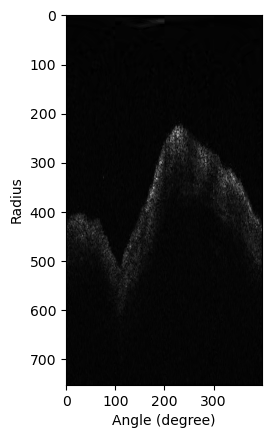

In [6]:
imageCar = Image.open("cart (1).jpg")  # read image
CarimageArray = np.asarray(imageCar)  # convert image into array
carImgArrayOut = cartesianToPolar2(CarimageArray)  # converting polar image array to cartesian image array

# Create a new image from the filtered data
carOutImge = Image.fromarray(carImgArrayOut)
# Save the filtered grayscale image
carOutImge.save("polarOut.jpg", "JPEG")

plt.imshow(carImgArrayOut, cmap='gray')  # showing cartesian image array in gray
plt.xlabel("Angle (degree)")
plt.ylabel("Radius")
plt.show()

##### Polar to Cartesian function

In [7]:
def polarToCartesian(Img):
    R, Theta = Img.shape
    M = 512
    N = 512

    # Create a lookup table for m and n values
    m_lookup = np.zeros((R, Theta), dtype=int)
    n_lookup = np.zeros((R, Theta), dtype=int)

    for r in range(R):
        for theta in range(Theta):
            m_lookup[r, theta] = int(np.floor(r * (M / (2 * R)) * math.cos((theta * (2 * math.pi / Theta) + math.pi)) + M / 2))
            n_lookup[r, theta] = int(np.floor(r * (N / (2 * R)) * math.sin((theta * (2 * math.pi / Theta) + math.pi)) + N / 2))

    outImg = np.zeros((M, N), dtype=np.uint8)

    for r in range(R):
        for theta in range(Theta):
            m = m_lookup[r, theta]
            n = n_lookup[r, theta]
            outImg[m, n] = Img[r, theta]

    return outImg


##### Polar to Cartesian conversion

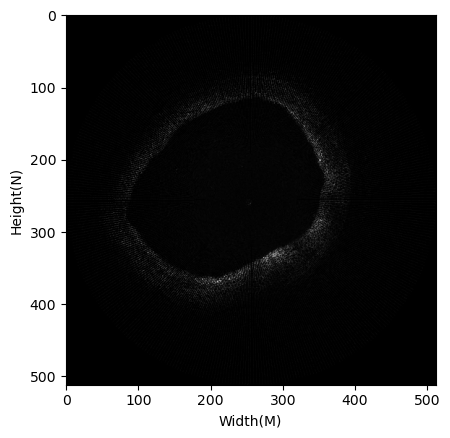

In [8]:
imagePol = Image.open('polar.jpg')  # read image 
imagePolArray = np.asarray(imagePol)  # convert image to array
polarArrayOut = polarToCartesian(imagePolArray)  # converting cartesian image array to polar image array

# Create a new image from the filtered data
polOutImge = Image.fromarray(polarArrayOut)
# Save the filtered grayscale image
polOutImge.save("cartOut.jpg", "JPEG")

plt.imshow(polarArrayOut, cmap='gray')  # showing polar image array in gray
plt.xlabel("Width(M)")
plt.ylabel("Height(N)")
plt.show()

##### Mean square error calculation

In [9]:
# Calculate the MSE between the outputs and the originals
mse_cartesian_to_polar = calculate_mse(carImgArrayOut, imagePolArray)
mse_polar_to_cartesian = calculate_mse(polarArrayOut, CarimageArray)

# Print the MSE values
print(f"MSE between polarToCartesian output and original cartesian: {mse_polar_to_cartesian}")
print(f"MSE between cartesianToPolar output and original polar: {mse_cartesian_to_polar}")

MSE between polarToCartesian output and original cartesian: 25.91533660888672
MSE between cartesianToPolar output and original polar: 17.395428856382978


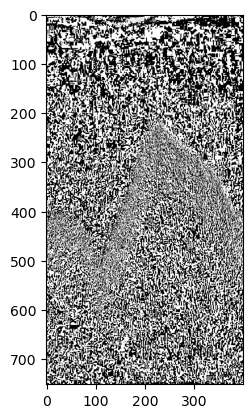

In [10]:
# Calculate the MSE between the output and the original
polarOriginal = Image.open('polar.jpg')
polarOriginal_array = np.asarray(polarOriginal)
polarOutput = Image.open('polarOut.jpg')
polarOutput_array = np.asarray(polarOutput)

mse_imagectp = (polarOriginal_array - polarOutput_array)

# Display the MSE image
plt.imshow(mse_imagectp, 'gray') 
plt.show()

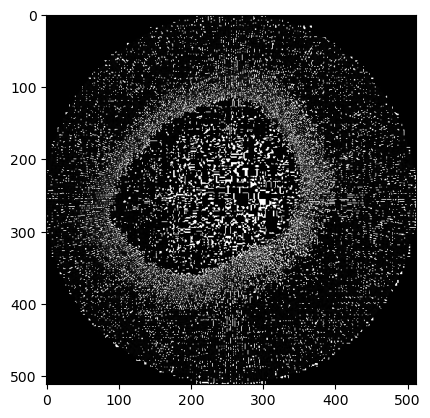

In [11]:
# Calculate the MSE between the output and the original
carOriginal = Image.open('cart (1).jpg')
carOriginal_array = np.asarray(carOriginal)
carOutput = Image.open('cartOut.jpg')
carOutput_array = np.asarray(carOutput)

mse_imageptc = (carOriginal_array - carOutput_array)

# Display the MSE image
plt.imshow(mse_imageptc, 'gray') 
plt.show()

##### Dynamic range compression

In [17]:
# Open an image file
image = Image.open("cart (1).jpg")

a=0
b=52.94
c=1

# size of the image
rowImg, columnImg = image.size

g=np.zeros((rowImg,columnImg))

# loop over each pixel
for x in range(rowImg):
    for y in range(columnImg):
        i = image.getpixel((x, y))
        temp= a + b*np.log10(i+c)
        g[x,y]= temp
         
#converting the values into uint8            
g= g.astype(np.uint8)      

#print(np.unique(g))

#using the uint8 values in intensity matrix modifying the image
for x in range(rowImg):
    for y in range(columnImg):
        inty = g[x][y]
        inty=int(inty)
        image.putpixel((x, y), inty)

# Save the generated image
image.save("cartComp.jpg")

# To display the image
image.show()